In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
cp,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
trestbps,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
restecg,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
thalach,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exang,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


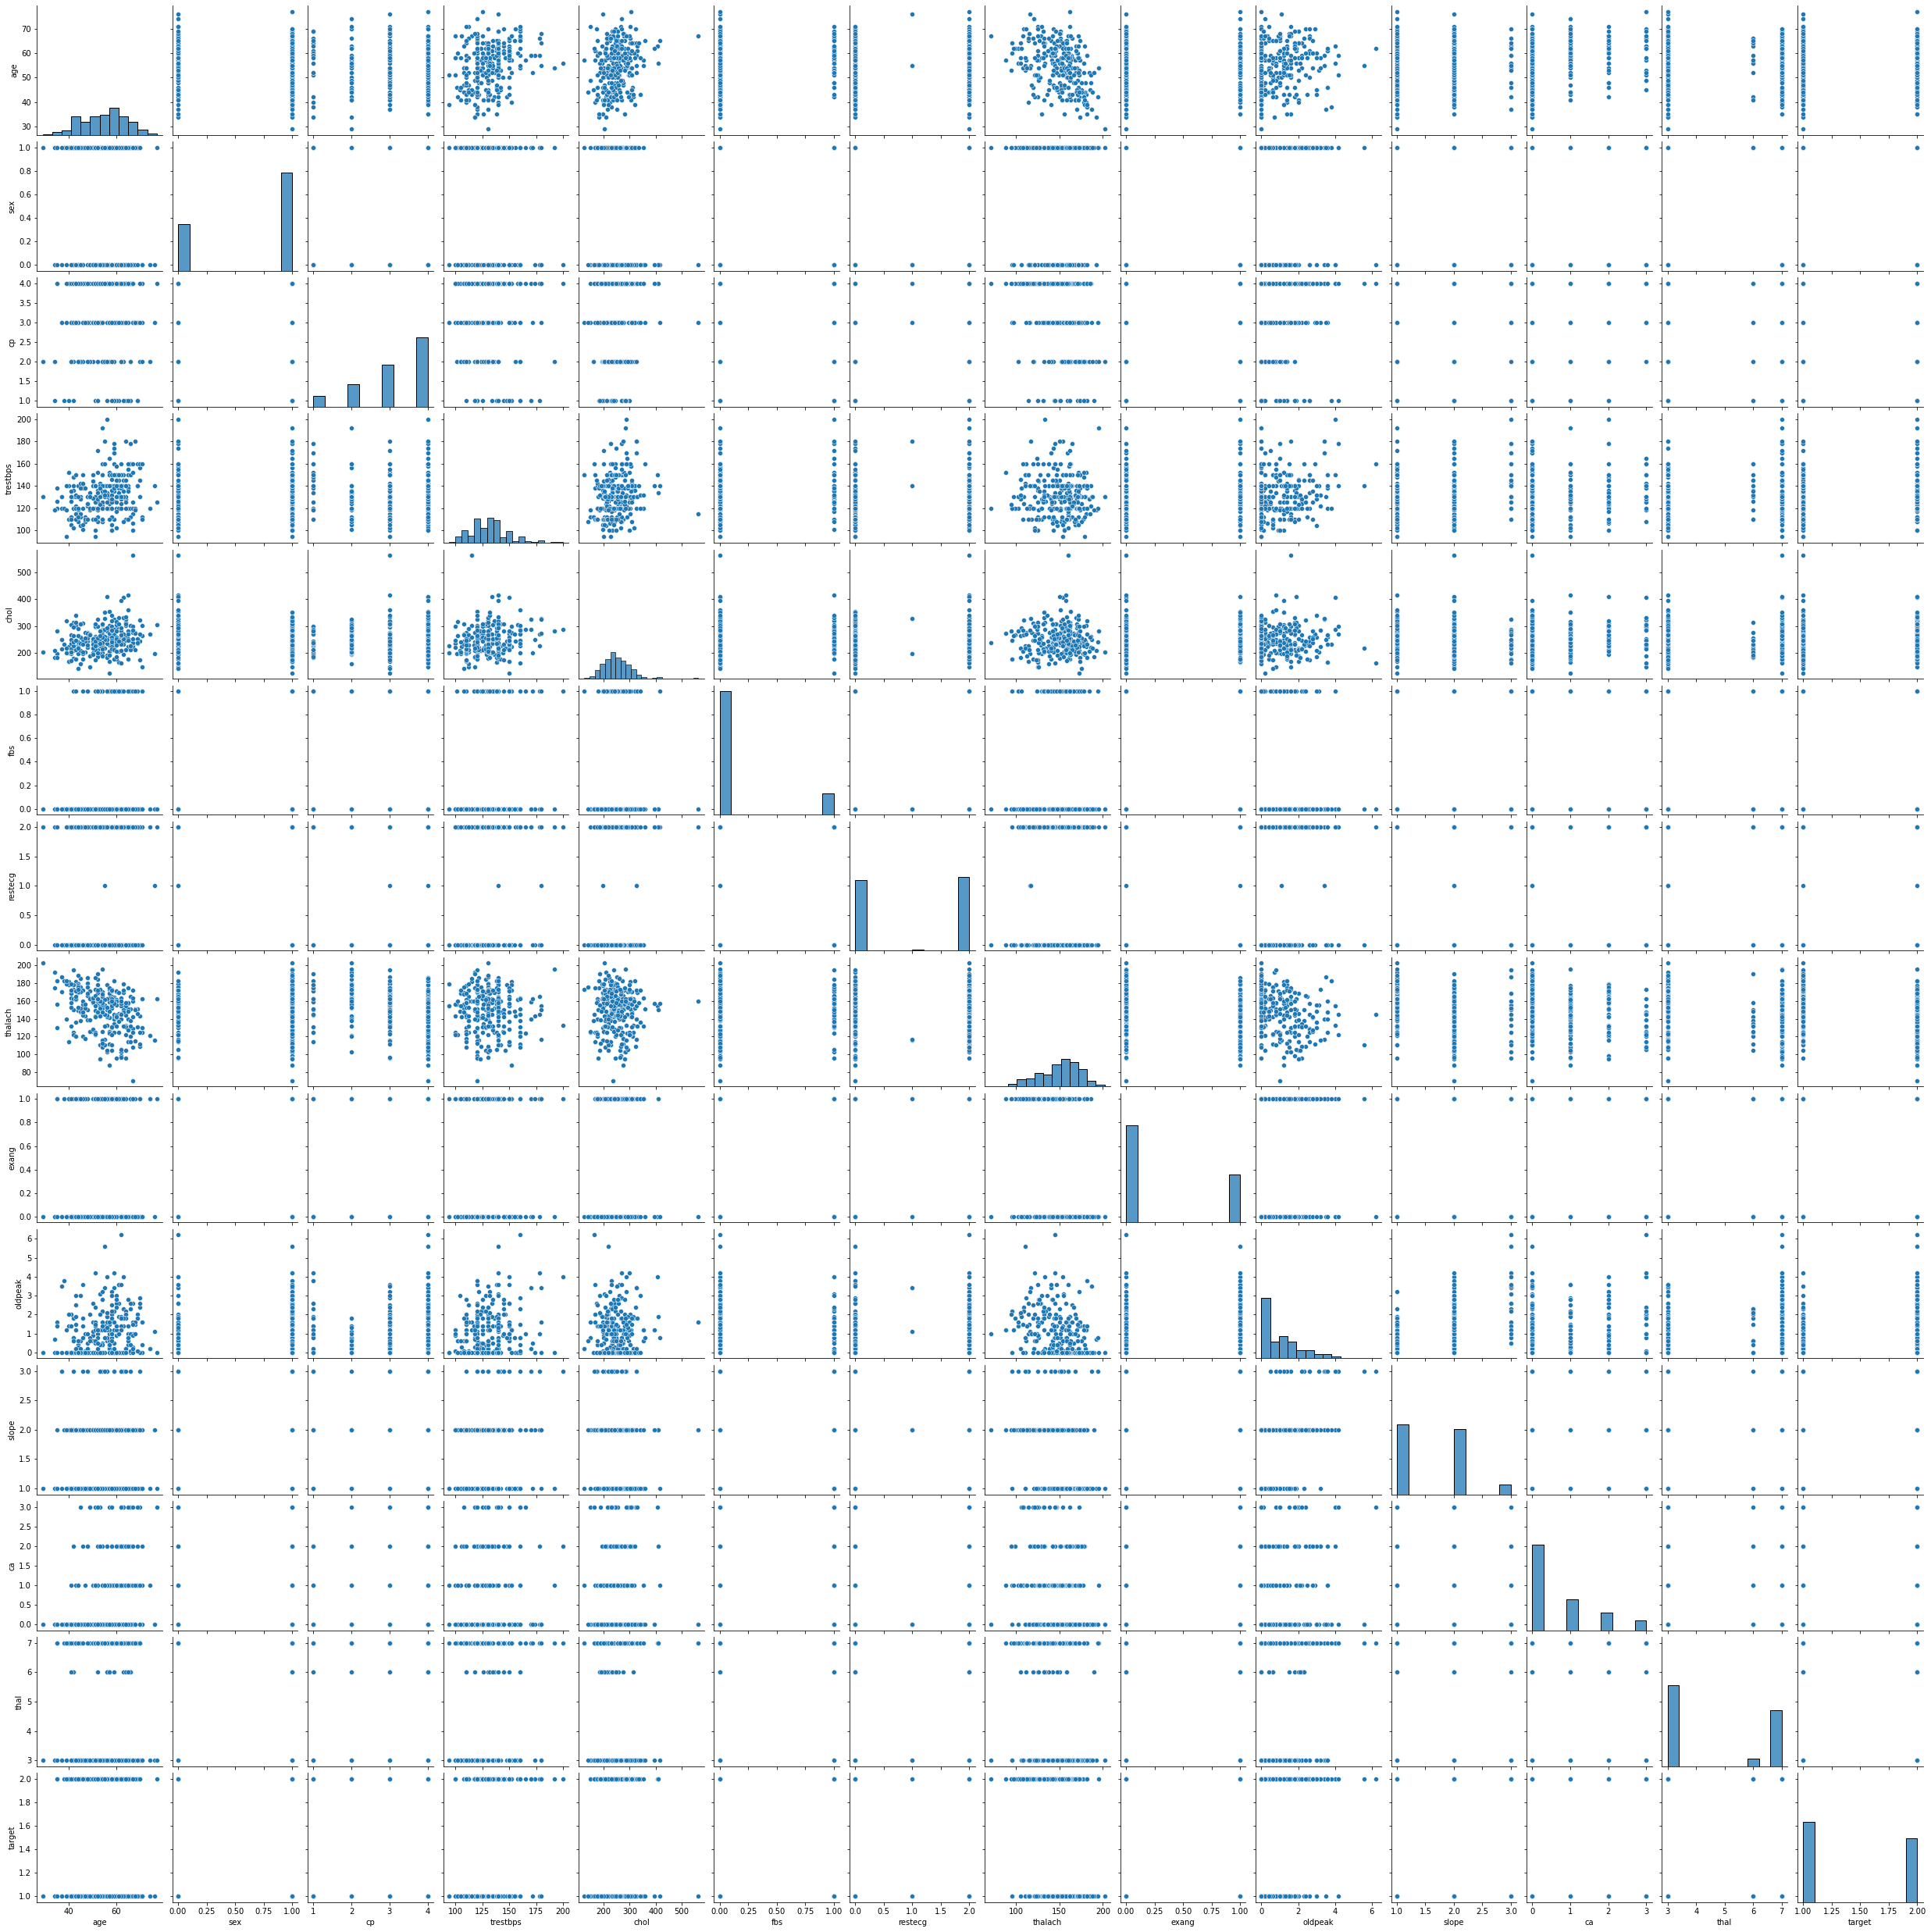

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
cp,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
trestbps,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
fbs,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
restecg,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
thalach,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
exang,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


<AxesSubplot:xlabel='sex', ylabel='count'>

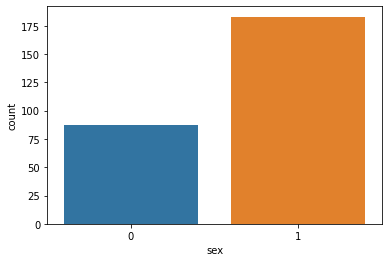

In [8]:
sns.countplot(x="sex",data=df)

<AxesSubplot:xlabel='cp', ylabel='count'>

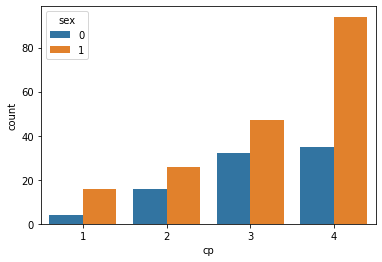

In [9]:
sns.countplot(x="cp",data=df,hue="sex")

<AxesSubplot:xlabel='restecg', ylabel='count'>

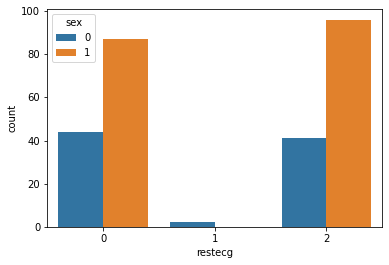

In [10]:
sns.countplot(x="restecg",data=df,hue="sex")

<AxesSubplot:xlabel='slope', ylabel='count'>

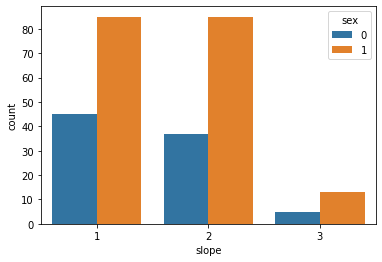

In [11]:
sns.countplot(x="slope",data=df,hue="sex")

<AxesSubplot:xlabel='fbs', ylabel='count'>

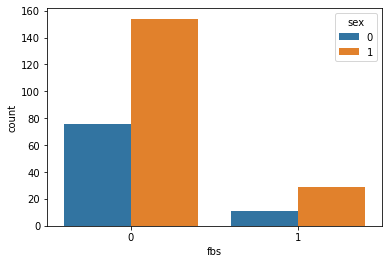

In [12]:
sns.countplot(x="fbs",data=df,hue="sex")

<AxesSubplot:xlabel='ca', ylabel='count'>

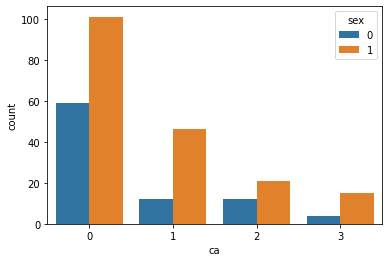

In [13]:
sns.countplot(x="ca",data=df,hue="sex")

<AxesSubplot:xlabel='thal', ylabel='count'>

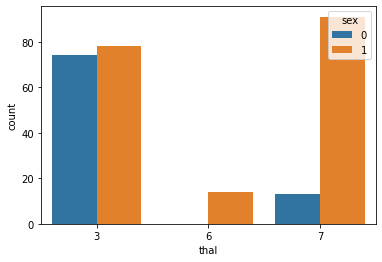

In [14]:
sns.countplot(x="thal",data=df,hue="sex")

<AxesSubplot:xlabel='exang', ylabel='count'>

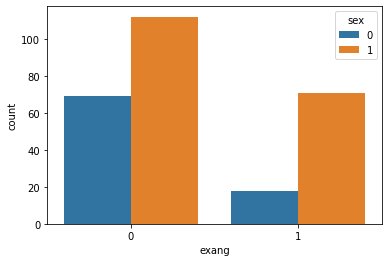

In [15]:
sns.countplot(x="exang",data=df,hue="sex")

<AxesSubplot:xlabel='thal', ylabel='count'>

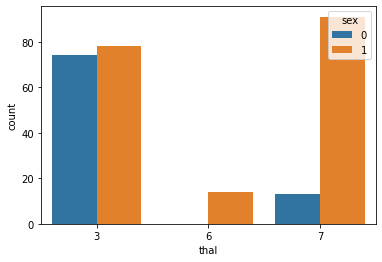

In [16]:
sns.countplot(x="thal",data=df,hue="sex")

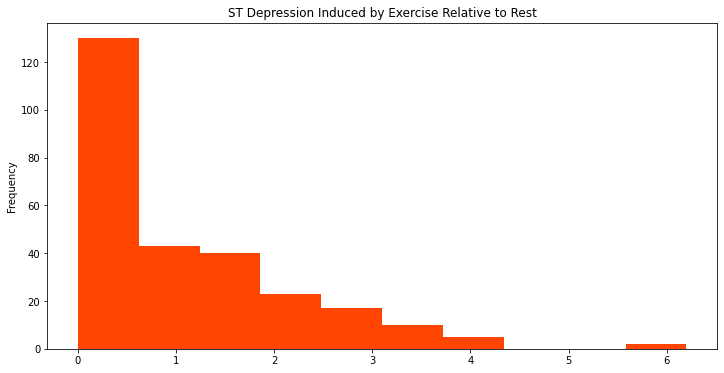

In [17]:
df['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (12, 6), color='orangered')
plt.show()

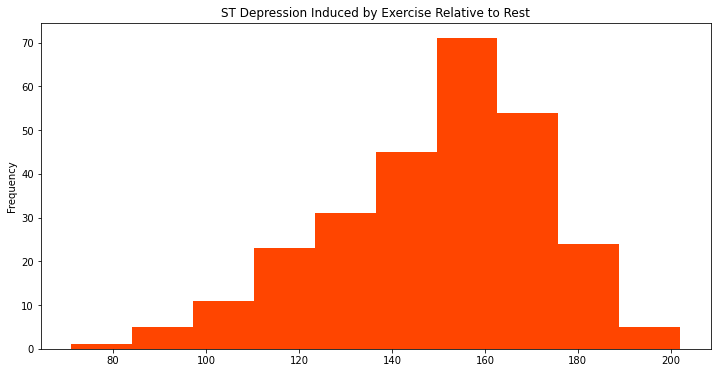

In [18]:
df['thalach'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (12, 6), color='orangered')
plt.show()

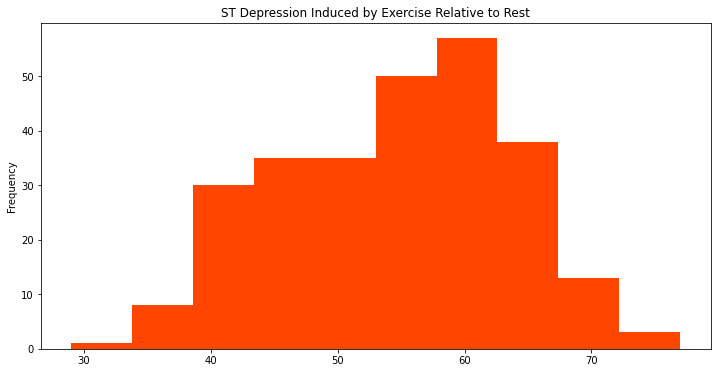

In [19]:
df['age'].plot(kind = 'hist',title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (12, 6), color='orangered')
plt.show()

<AxesSubplot:title={'center':'Resting electrocardiographic results'}, xlabel='restecg'>

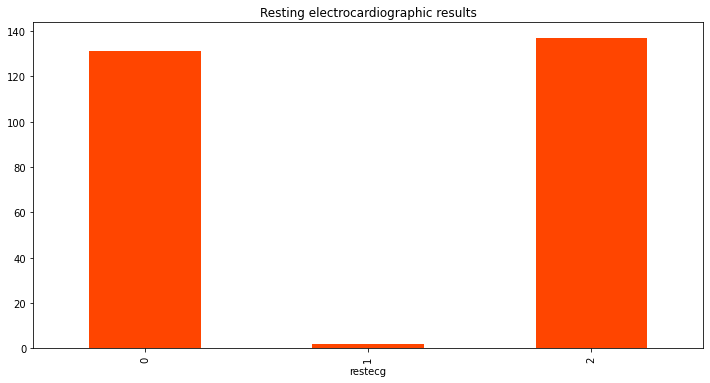

In [20]:
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting electrocardiographic results', figsize = (12, 6), color='orangered')


<AxesSubplot:title={'center':'Fasting blood sugar'}, xlabel='fbs'>

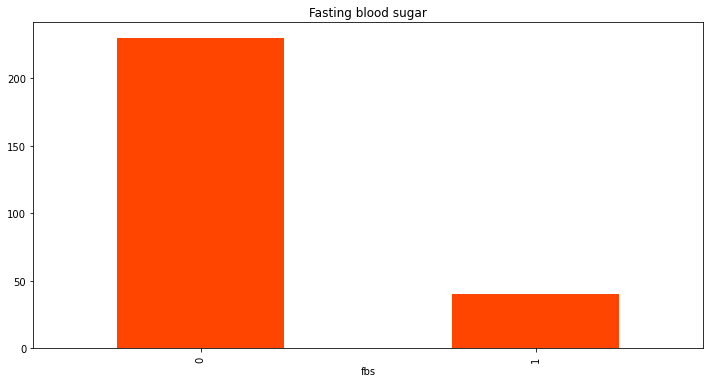

In [21]:
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting blood sugar', figsize = (12, 6), color='orangered')


<AxesSubplot:title={'center':'number of major vessels '}, xlabel='ca'>

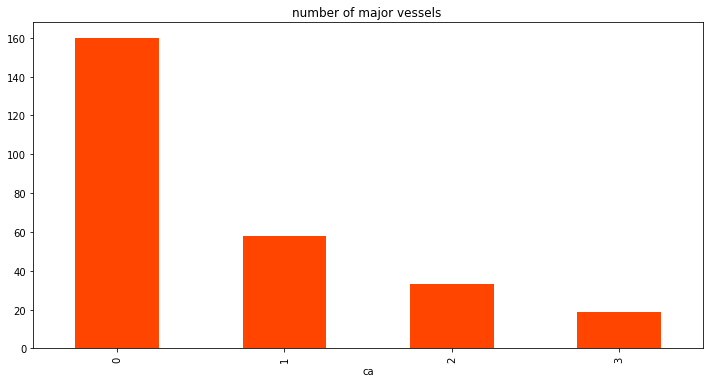

In [22]:
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', title = 'number of major vessels ', figsize = (12, 6), color='orangered')


<AxesSubplot:title={'center':'chest pain type '}, xlabel='cp'>

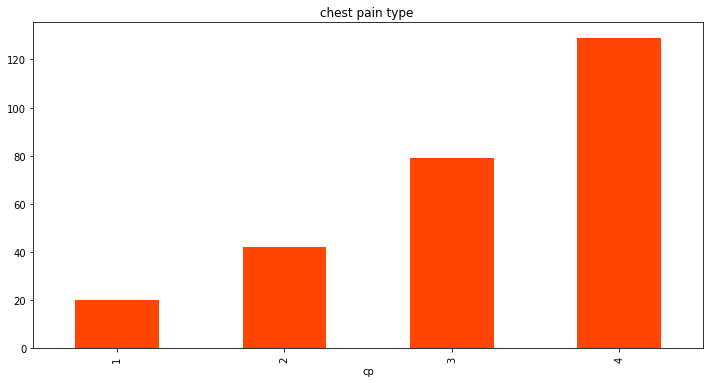

In [23]:
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'chest pain type ', figsize = (12, 6), color='orangered')


<AxesSubplot:title={'center':'age '}, xlabel='age'>

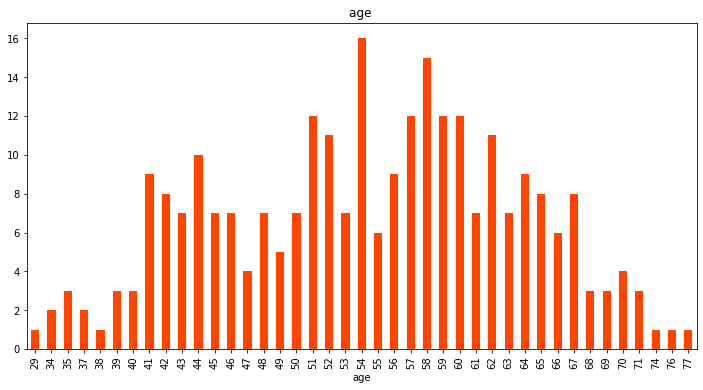

In [24]:
df.groupby(df['age']).count()['target'].plot(kind = 'bar', title = 'age ', figsize = (12, 6), color='orangered')


<AxesSubplot:title={'center':'sex '}, xlabel='sex'>

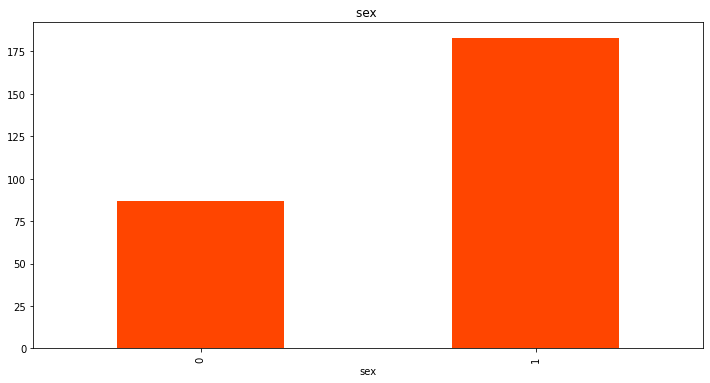

In [25]:
df.groupby(df['sex']).count()['target'].plot(kind = 'bar', title = 'sex ', figsize = (12, 6), color='orangered')


<AxesSubplot:title={'center':'thalach '}, xlabel='slope'>

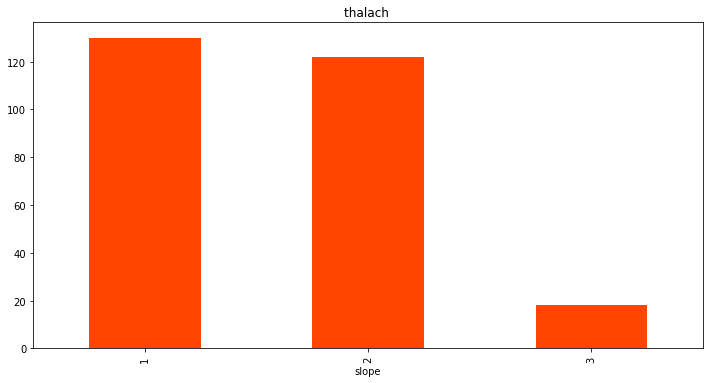

In [26]:
df.groupby(df['slope']).count()['target'].plot(kind = 'bar', title = 'thalach ', figsize = (12, 6), color='orangered')


<AxesSubplot:title={'center':'exang '}, xlabel='exang'>

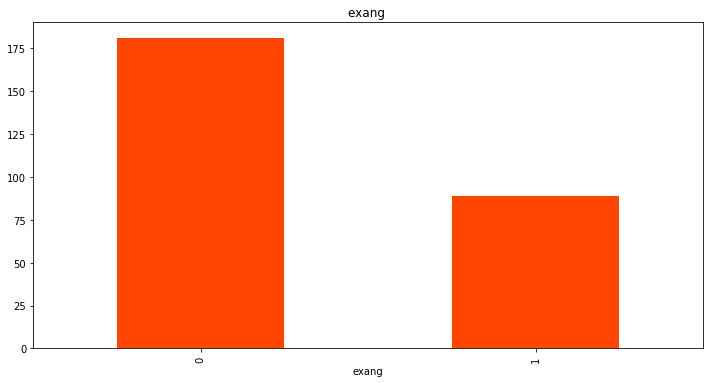

In [27]:
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'exang ', figsize = (12, 6), color='orangered')


## Conclusion
      male have heart disease then female
      people in age 54 
      rectecg normal,probable or definite left ventricular hypertrophy  most apear disease 
      number of major vessels 1 have heart disease then other
      chest pain type asymptomatic have heart disease then other
      the slope of the peak exercise ST segment (0=upsloping; 1=flat)have heart disease then other
      people don<t do exercise have heart disease


In [28]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
208,64,1,3,125,309,0,0,131,1,1.8,2,0,7,2


E:\download\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

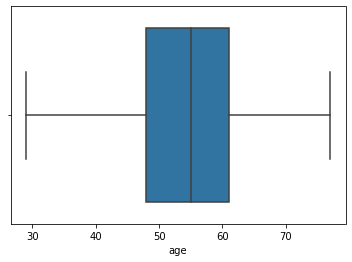

In [29]:
sns.boxplot(df.age)


E:\download\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

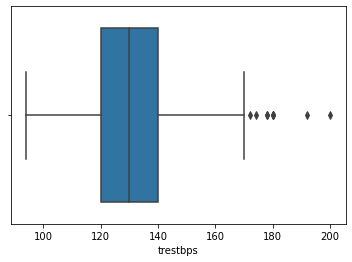

In [30]:
sns.boxplot(df.trestbps)


<AxesSubplot:ylabel='oldpeak'>

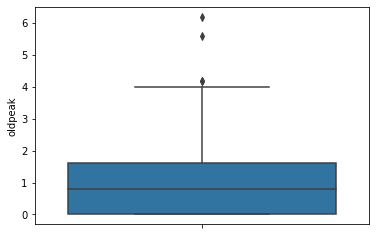

In [32]:
sns.boxplot(y=df.oldpeak)


<AxesSubplot:ylabel='chol'>

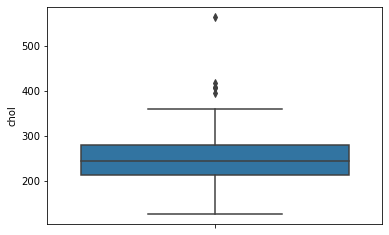

In [33]:
sns.boxplot(y=df.chol)


<AxesSubplot:ylabel='thalach'>

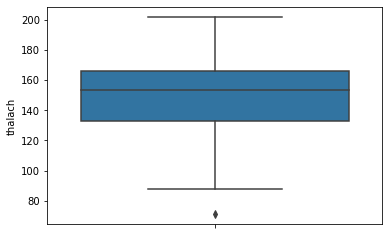

In [34]:
sns.boxplot(y=df.thalach)


In [35]:
y=df.target
x=df.drop("target",axis=1)

In [36]:
y.shape

(270,)

In [37]:
x.shape

(270, 13)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)


In [39]:
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


In [40]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.8646288209606987

In [41]:
y_pred_test = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7561


In [42]:
mean_absolute_error(y_test, y_pred_test)

0.24390243902439024

In [43]:
sv = SVC()
sv.fit(X_train, y_train)
sv.score(X_train, y_train)

0.9213973799126638

In [44]:
y_pred = sv.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7561


In [45]:
mean_absolute_error(y_test, y_pred)

0.24390243902439024

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy_score(y_test, predictions)

0.7804878048780488